We'll start by downloading the Excel file this is all based on.

In [ ]:
import pandas as pd

url = "https://github.com/jsoma/ire24-cleaning/raw/main/IRE24%20-%20Data%20cleaning%20worksheet.xlsx"
df = pd.read_excel(url)
df.to_excel("IRE24 - Data cleaning worksheet.xlsx", index=False)

# Tow trucks

In [1]:
import pandas as pd

df = pd.read_excel("IRE24 - Data cleaning worksheet.xlsx", sheet_name='tow trucks')
df.head()

,Number of tow trucks,Physical address
0,Number of tow trucks: 0,"14367 GATEWAY WEST, EL PASO, TX 79927"
1,Number of tow trucks: 4,"3402 AGNES ST, CORPUS CHRISTI, TX 78405"
2,Number of tow trucks: 1,"1312 E COMMERCIAL ST, VICTORIA, TX 77901"
3,Number of tow trucks: 12,"8035 E R L THORNTON FWY STE 590, DALLAS, TX 75228"


## Calculate total number of tow trucks

In [2]:
df['Number of tow trucks'].str.replace("Number of tow trucks: ", "")

0     0
1     4
2     1
3    12
Name: Number of tow trucks, dtype: object

In [3]:
df['Number of tow trucks'].str.replace("Number of tow trucks: ", "").astype(int)

0     0
1     4
2     1
3    12
Name: Number of tow trucks, dtype: int64

In [4]:
df['truck_count'] = df['Number of tow trucks'].str.replace("Number of tow trucks: ", "").astype(int)
df

,Number of tow trucks,Physical address,truck_count
0,Number of tow trucks: 0,"14367 GATEWAY WEST, EL PASO, TX 79927",0
1,Number of tow trucks: 4,"3402 AGNES ST, CORPUS CHRISTI, TX 78405",4
2,Number of tow trucks: 1,"1312 E COMMERCIAL ST, VICTORIA, TX 77901",1
3,Number of tow trucks: 12,"8035 E R L THORNTON FWY STE 590, DALLAS, TX 75228",12


In [5]:
df.truck_count.sum()

17

## Extract the address

In [8]:
details = df['Physical address'].str.split(", ", expand=True)
details.columns = ['street', 'city', 'state-zip']
details

,street,city,state-zip
0,14367 GATEWAY WEST,EL PASO,TX 79927
1,3402 AGNES ST,CORPUS CHRISTI,TX 78405
2,1312 E COMMERCIAL ST,VICTORIA,TX 77901
3,8035 E R L THORNTON FWY STE 590,DALLAS,TX 75228


In [9]:
df = df.join(details)
df

,Number of tow trucks,Physical address,truck_count,street,city,state-zip
0,Number of tow trucks: 0,"14367 GATEWAY WEST, EL PASO, TX 79927",0,14367 GATEWAY WEST,EL PASO,TX 79927
1,Number of tow trucks: 4,"3402 AGNES ST, CORPUS CHRISTI, TX 78405",4,3402 AGNES ST,CORPUS CHRISTI,TX 78405
2,Number of tow trucks: 1,"1312 E COMMERCIAL ST, VICTORIA, TX 77901",1,1312 E COMMERCIAL ST,VICTORIA,TX 77901
3,Number of tow trucks: 12,"8035 E R L THORNTON FWY STE 590, DALLAS, TX 75228",12,8035 E R L THORNTON FWY STE 590,DALLAS,TX 75228


## Extract the ZIP code

In [12]:
df['zipcode'] = df['Physical address'].str.extract("TX (\d\d\d\d\d)")
df

,Number of tow trucks,Physical address,truck_count,street,city,state-zip,zipcode
0,Number of tow trucks: 0,"14367 GATEWAY WEST, EL PASO, TX 79927",0,14367 GATEWAY WEST,EL PASO,TX 79927,79927
1,Number of tow trucks: 4,"3402 AGNES ST, CORPUS CHRISTI, TX 78405",4,3402 AGNES ST,CORPUS CHRISTI,TX 78405,78405
2,Number of tow trucks: 1,"1312 E COMMERCIAL ST, VICTORIA, TX 77901",1,1312 E COMMERCIAL ST,VICTORIA,TX 77901,77901
3,Number of tow trucks: 12,"8035 E R L THORNTON FWY STE 590, DALLAS, TX 75228",12,8035 E R L THORNTON FWY STE 590,DALLAS,TX 75228,75228


# Locksmiths

In [14]:
import pandas as pd

# I need the see the long long "Business Legal/Trading" blah blah column
pd.options.display.max_colwidth = None

df = pd.read_excel("IRE24 - Data cleaning worksheet.xlsx", sheet_name='locksmiths')
df.head()

,Personal Name,Business Legal/Trading as Name and Street Address,City,State,Zip,Expiration,Category,Reg. #
0,JOSE A. MALDONADO,ELKIN LOCKSMITH 3719 FERRARA DRIVE Total Active Employees: 0,SILVER SPRING,MD,20906,2026-05-06,LOCKSMITH,635
1,TERRY ROSEMOND,"SERVICE REPAIRS, LLC 13108 CAMELLIA DRIVE Total Active Employees: 0",SILVER SPRING,MD,20906,2024-11-30,LOCKSMITH,380
2,ROBERT EASTER,EASTER'S LOCK & SECURITY SOLUTIONS 1713 E JOPPA ROAD Total Active Employees: 12,BALTIMORE,MD,21234,2025-01-31,LOCKSMITH,10
3,ARTEM SHIMSHEVICH,"LOCKSMITH ON DUTY, LLC 4 STRABANE COURT Total Active Employees: 0",PARKVILLE,MD,21234,2025-03-12,LOCKSMITH,62
4,ELMER CHAVEZ RODRIGUEZ,"AUTOTRONICS, INC 267 KENTLANDS BLVD. #1066 Total Active Employees: 0",GAITHERSBURG,MD,20878,2024-09-16,LOCKSMITH,288


## Number of employees

In [17]:
df['employees'] = df['Business Legal/Trading as Name and Street Address'].str.extract("Total Active Employees: (\d+)").astype(int)
df.head()

,Personal Name,Business Legal/Trading as Name and Street Address,City,State,Zip,Expiration,Category,Reg. #,employees
0,JOSE A. MALDONADO,ELKIN LOCKSMITH 3719 FERRARA DRIVE Total Active Employees: 0,SILVER SPRING,MD,20906,2026-05-06,LOCKSMITH,635,0
1,TERRY ROSEMOND,"SERVICE REPAIRS, LLC 13108 CAMELLIA DRIVE Total Active Employees: 0",SILVER SPRING,MD,20906,2024-11-30,LOCKSMITH,380,0
2,ROBERT EASTER,EASTER'S LOCK & SECURITY SOLUTIONS 1713 E JOPPA ROAD Total Active Employees: 12,BALTIMORE,MD,21234,2025-01-31,LOCKSMITH,10,12
3,ARTEM SHIMSHEVICH,"LOCKSMITH ON DUTY, LLC 4 STRABANE COURT Total Active Employees: 0",PARKVILLE,MD,21234,2025-03-12,LOCKSMITH,62,0
4,ELMER CHAVEZ RODRIGUEZ,"AUTOTRONICS, INC 267 KENTLANDS BLVD. #1066 Total Active Employees: 0",GAITHERSBURG,MD,20878,2024-09-16,LOCKSMITH,288,0


In [22]:
df.employees.value_counts().sort_index()

employees
0     69
1      7
2      1
4      3
8      1
12     1
18     1
Name: count, dtype: int64

## Physical address

In [23]:
df['address'] = df['Business Legal/Trading as Name and Street Address'].str.extract(" (\d.*) Total Active Employees:")
df

,Personal Name,Business Legal/Trading as Name and Street Address,City,State,Zip,Expiration,Category,Reg. #,employees,address
0,JOSE A. MALDONADO,ELKIN LOCKSMITH 3719 FERRARA DRIVE Total Active Employees: 0,SILVER SPRING,MD,20906,2026-05-06,LOCKSMITH,635,0,3719 FERRARA DRIVE
1,TERRY ROSEMOND,"SERVICE REPAIRS, LLC 13108 CAMELLIA DRIVE Total Active Employees: 0",SILVER SPRING,MD,20906,2024-11-30,LOCKSMITH,380,0,13108 CAMELLIA DRIVE
2,ROBERT EASTER,EASTER'S LOCK & SECURITY SOLUTIONS 1713 E JOPPA ROAD Total Active Employees: 12,BALTIMORE,MD,21234,2025-01-31,LOCKSMITH,10,12,1713 E JOPPA ROAD
3,ARTEM SHIMSHEVICH,"LOCKSMITH ON DUTY, LLC 4 STRABANE COURT Total Active Employees: 0",PARKVILLE,MD,21234,2025-03-12,LOCKSMITH,62,0,4 STRABANE COURT
4,ELMER CHAVEZ RODRIGUEZ,"AUTOTRONICS, INC 267 KENTLANDS BLVD. #1066 Total Active Employees: 0",GAITHERSBURG,MD,20878,2024-09-16,LOCKSMITH,288,0,267 KENTLANDS BLVD. #1066
...,...,...,...,...,...,...,...,...,...,...
78,SHIMON SHIFMAN,SLS LOCKSMITH SERVICES INC 10390 SWIFT STREAM PLACE APT 301 Total Active Employees: 0,COLUMBIA,MD,21044,2026-04-23,LOCKSMITH,632,0,10390 SWIFT STREAM PLACE APT 301
79,MAOR BEN IESHAI,LOCK - A - ROO LOCKSMITH 427 PATRIOTS WAY Total Active Employees: 0,ELKTON,MD,21921,2024-12-19,LOCKSMITH,554,0,427 PATRIOTS WAY
80,STEVEN MUYSKENS,"STEVE'S ROAD SERVICE, LLC 104 WAYSIDE DRIVE Total Active Employees: 1",ELKTON,MD,21921,2024-10-06,LOCKSMITH,292,1,104 WAYSIDE DRIVE
81,JAMES MULLINS,"FOCUS MANAGEMENT, INC. DBA SURE-FIT SECURITY / LOCK & SAFE CO. 8213 FENTON STREET Total Active Employees: 8",SILVER SPRING,MD,20910,2025-06-25,LOCKSMITH,94,8,8213 FENTON STREET


## Tow trucks Part 2

In [50]:
import pandas as pd

# I need the see the long long "Business Legal/Trading" blah blah column
pd.options.display.max_colwidth = None

df = pd.read_excel("IRE24 - Data cleaning worksheet.xlsx", sheet_name='tow trucks 2')
df.head()

TDLR  \
0  006534502C   
1  006546993C   
2  006579452C   
3  006532111C   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        page_contents  
0                                                                                                                                          

In [51]:
df['phone_num'] = df.page_contents.str.extract(r"(\d\d\d-?\d\d\d-?\d\d\d\d)")
df

TDLR  \
0  006534502C   
1  006546993C   
2  006579452C   
3  006532111C   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        page_contents  \
0                                                                                                                                         

In [52]:
import instructor
from pydantic import BaseModel, Field
from openai import OpenAI
from typing import List
from typing_extensions import Literal
from pydantic.functional_validators import field_validator
from typing import Optional

class Business(BaseModel):
    business_name: str = Field(description="Business name")
    owners: str = Field(description="Owners of the company")
    physical_address: str
    phone_number: Optional[str]

    @field_validator("phone_number")
    @classmethod
    def validate_email(cls, value):
        if value and '-' not in value:
            raise ValueError("Phone number must be formatted as xxx-xxx-xxxx")
        return value

client = instructor.from_openai(OpenAI(api_key='YOUR API KEY GOES HERE'))

In [53]:
sample_company = """
\n<table align="center" width="" border="0" cellpadding="0" cellspacing="0"> \n <tbody><tr>\n <td bgcolor="#FFF8DC"><font face="Arial" size="2"><strong>Company Information:</strong></font></td><td bgcolor="#FFF8DC"><img src="SPACER.gif"></td>\n </tr>\n <tr>\n <td width="50%" align="left"><strong>Name:&nbsp;&nbsp;&nbsp;</strong>FAST RESPONDER TOWING LLC</td>\n\n <td width="50%" align="left"><strong>DBA:&nbsp;&nbsp;&nbsp;</strong>JLS TOWING</td> \n </tr>\n\n\n <tr>\n <td width="400" align="left"><strong>Owner/Officer:&nbsp;&nbsp;&nbsp;</strong>PHILLIP GERALD OWEN / PRESIDENT <br></td>\n <td><img src="SPACER.gif"></td>\n </tr>\n \n <tr>\n\n <td><strong>Phone:</strong>&nbsp;&nbsp;&nbsp;817-779-4416<br><br></td>\n <td><img src="SPACER.gif"></td>\n </tr>\n</tbody></table>\n<table align="center" width="96%" border="1" cellpadding="1" cellspacing="0"> \n <tbody><tr>\n <td bgcolor="#FFF8DC"><strong>Certificate Information:</strong></td>\n <td bgcolor="#FFF8DC"><strong>Status:</strong>&nbsp;&nbsp;<font color="green"><font color="green">Active</font></font></td>\n </tr>\n <tr>\n <td nowrap="nowrap"><strong>Number:&nbsp;&nbsp;</strong><font color="green"><b>006532111C</b> (<font color="green">Active</font>)</font></td>\n <td nowrap="nowrap"><strong>Carrier Type:</strong>&nbsp;&nbsp;Tow Truck Company\n <br>\n \n <b>Number of Active Tow Trucks:</b> &nbsp; 12\n <br><br>\n <strong>Address Information</strong><br>\n <strong>Mailing:</strong><br>\n\n8035 E R L THORNTON FWY<br>\n STE 590<br>\n DALLAS,&nbsp;TX.&nbsp;75228\n <br><br>\n\n <strong>Physical:</strong><br>\n\n8035 E R L THORNTON FWY<br>\n STE 590<br>\n DALLAS,&nbsp;TX.&nbsp;75228\n </td>\n </tr>\n</tbody></table>\n</font></td></tr></tbody></table>\n<form method="post" action="mccs_information_display.asp#anchor" name="typeinfo">\n<table border="0" cellpadding="0" cellspacing="0">\n <tbody><tr><td colspan="6" bgcolor="#FFF8DC"><strong>View Company Information By:</strong><br></td>\n </tr><tr>\n <td><input type="radio" name="infotype" value="Activity">Activity</td>\n <td><input type="radio" name="infotype" value="Insurance">Insurance</td>\n <td><input type="radio" name="infotype" value="Vehicle">Vehicle</td>\n <td><input type="radio" name="infotype" value="Carrier" checked="">Company Information</td>\n \n <!--<td><img src="SPACER.gif"></td> ''by Tao, to show the following message instead. 11-16-2009-->\n <td>&nbsp;&nbsp;<font color="maroon">No Tow Fee Schedule on file</font>&nbsp;</td>\n \n <td><button type="submit" id="submit3" name="proc">&nbsp;Go&nbsp;</button></td> \n </tr>\n</tbody></table>	
"""

result = client.chat.completions.create(
    model='gpt-3.5-turbo',
    response_model=Business,
    messages=[{"role": "user", "content": sample_company}],
    max_retries=3
)
result

Business(business_name='FAST RESPONDER TOWING LLC', owners='PHILLIP GERALD OWEN / PRESIDENT', physical_address='8035 E R L THORNTON FWY, STE 590, DALLAS, TX. 75228', phone_number='817-779-4416')

In [54]:
def extract_details(page_contents):
    result = client.chat.completions.create(
        model='gpt-3.5-turbo',
        response_model=Business,
        messages=[{"role": "user", "content": page_contents}],
        max_retries=3
    )

    return pd.Series(result.dict())

In [55]:
details = df['page_contents'].apply(extract_details)
details

,business_name,owners,physical_address,phone_number
0,SKYHAWK T&R L.L.C.,DAN A PICHARDO / VICTORIANO MENDOZA,"14367 GATEWAY WEST EL PASO, TX. 79927",915-216-1416
1,GULF COAST ASSET RECOVERY LLC,"ELOY CASTILLO / CEO, KRISTINA NAVARRO GREEN / MANAGER, MARY F PEREZ / MANAGER","3402 AGNES ST, CORPUS CHRISTI, TX 78405",361-331-2116
2,AAA ASSET RECOVERY LLC,AARON M AYALA / PRESIDENT,"1312 E COMMERCIAL ST VICTORIA, TX 77901",None
3,FAST RESPONDER TOWING LLC,PHILLIP GERALD OWEN / PRESIDENT,"8035 E R L THORNTON FWY STE 590 DALLAS, TX. 75228",817-779-4416


In [56]:
df = df.join(details)
df

TDLR  \
0  006534502C   
1  006546993C   
2  006579452C   
3  006532111C   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        page_contents  \
0                                                                                                                                         

## State table

In [57]:
import pandas as pd

tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_historical_population")
len(tables)

8

In [59]:
df = tables[3]
df

,Name,1960,1970,1980,1990,2000,2010,2020
0,Alabama,3266740,3444165,3893888,4040587,4447100,4779736,5024279
1,Alaska,226167,300382,401851,550043,626932,710231,733391
2,American Samoa,20051,27159,32297,46773,57291,55519,49710
3,Arizona,1302161,1770900,2718215,3665228,5130632,6392017,7151502
4,Arkansas,1786272,1923295,2286435,2350725,2673400,2915918,3011524
5,California,15717204,19953134,23667902,29760021,33871648,37253956,39538223
6,Colorado,1753947,2207259,2889964,3294394,4301261,5029196,5773714
7,Connecticut,2535234,3031709,3107576,3287116,3405565,3574097,3608298
8,Delaware,446292,548104,594338,666168,783600,897934,989948
9,District of Columbia,763956,756510,638333,606900,572059,601723,689545


In [64]:
df = df.replace("\[.*\]", "", regex=True).replace(",", "", regex=True)
df

,Name,1960,1970,1980,1990,2000,2010,2020
0,Alabama,3266740,3444165,3893888,4040587,4447100,4779736,5024279
1,Alaska,226167,300382,401851,550043,626932,710231,733391
2,American Samoa,20051,27159,32297,46773,57291,55519,49710
3,Arizona,1302161,1770900,2718215,3665228,5130632,6392017,7151502
4,Arkansas,1786272,1923295,2286435,2350725,2673400,2915918,3011524
5,California,15717204,19953134,23667902,29760021,33871648,37253956,39538223
6,Colorado,1753947,2207259,2889964,3294394,4301261,5029196,5773714
7,Connecticut,2535234,3031709,3107576,3287116,3405565,3574097,3608298
8,Delaware,446292,548104,594338,666168,783600,897934,989948
9,District of Columbia,763956,756510,638333,606900,572059,601723,689545


In [68]:
# You can paste into datawrapper now!
df.to_clipboard()

In [69]:
# You can also transpose here
df.set_index('Name').T

Name,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,United States
1960,3266740,226167,20051,1302161,1786272,15717204,1753947,2535234,446292,763956,...,9579677,32099,890627,389881,3966949,2853214,1860421,3951777,330066,179323175
1970,3444165,300382,27159,1770900,1923295,19953134,2207259,3031709,548104,756510,...,11196730,62468,1059273,444330,4648494,3409169,1744237,4417731,332416,203211926
1980,3893888,401851,32297,2718215,2286435,23667902,2889964,3107576,594338,638333,...,14229191,96569,1461037,511456,5346818,4132156,1949644,4705767,469557,226545805
1990,4040587,550043,46773,3665228,2350725,29760021,3294394,3287116,666168,606900,...,16986510,101809,1722850,562758,6187358,4866692,1793477,4891769,453588,248709873
2000,4447100,626932,57291,5130632,2673400,33871648,4301261,3405565,783600,572059,...,20851820,108612,2233169,608827,7078515,5894121,1808344,5363675,493782,281421906
2010,4779736,710231,55519,6392017,2915918,37253956,5029196,3574097,897934,601723,...,25145561,106405,2763885,625741,8001024,6724540,1852994,5686986,563626,308745538
2020,5024279,733391,49710,7151502,3011524,39538223,5773714,3608298,989948,689545,...,29145505,87146,3271616,643077,8631393,7705281,1793716,5893718,576851,331449281


# NEISS

In [70]:
import pandas as pd

df = pd.read_excel("IRE24 - Data cleaning worksheet.xlsx", sheet_name='NEISS')
df.head()

,Age,Race,Other_Race,Narrative
0,15YO,1,NaN,15YOM PUNCHED A WALL AND C/O PAIN TO R HAND AND WRIST. +SWELLING / HAND FX
1,27YO,3,HISPANIC,27YOM PUNCHED A WALL NOW WITH LT HAND PAIN DX CLOSED FX OF 5TH METACARP AL
2,17YO,0,NaN,17 YOM - RT HAND FX - PT PUNCHED A DOOR 3 WEEKS AGO AND STILL HAS PAIN. NO MENTION OF BEING SEEN JUST PTA.
3,46YO,0,NaN,46 YR OLD FEMALE PLAYING INDOOR SOCCER AND HAD A FALL WITH H EADSTRIKE; BLUNT HEAD TRAUMA
4,10YO,0,NaN,"10YM ASSAULTED BY ANOTHER STUDENT WHO PUNCHED HIM TO FACE&FELL HITTING EHAD ONTO PLASTIC BOX,-LOC>>CHI"


## Clean up age to build a histogram

<Axes: >

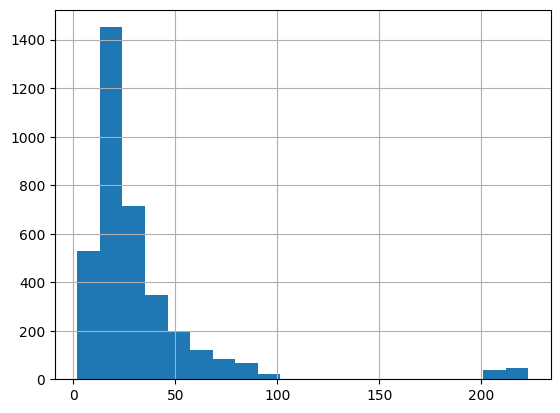

In [73]:
df['cleaned_age'] = df['Age'].str.replace("YO", "").astype(int)
df.cleaned_age.hist(bins=20)

## Only look at wall punchers

In [74]:
df[df.Narrative.str.contains("PUNCH.*WALL")]

,Age,Race,Other_Race,Narrative,cleaned_age
0,15YO,1,NaN,15YOM PUNCHED A WALL AND C/O PAIN TO R HAND AND WRIST. +SWELLING / HAND FX,15
1,27YO,3,HISPANIC,27YOM PUNCHED A WALL NOW WITH LT HAND PAIN DX CLOSED FX OF 5TH METACARP AL,27
11,22YO,1,NaN,22YOM PAIN TO L HAND WHEN PUNCHING A WALL / CONTUSION L HAND,22
15,34YO,1,NaN,34YOF C/O RT HAND INJURY FROM PUNCHING A WALL. DX; CLOSED FX 5TH METAC ARPAL,34
20,13YO,3,HISPANIC,"13 YOM PUNCHED A WALL WITH HIS RT. HAND, SWELLING & TENDER, 5TH METICARPAL. DX; BOXER'S FRACTURE",13
...,...,...,...,...,...
3616,22YO,2,NaN,"22 YOM HX IMPULSE CONTROL DISORDER, PUNCHED A WALL. C/O HAND PAIN DX HA ND CONTUSION",22
3619,21YO,0,NaN,21YOM WAS ANGRY AND PUNCHED A GLASS PICTURE THAT WAS HANGING ON A WALL LACERATION TO RIGHT HAND,21
3620,27YO,1,NaN,27YOMC PUNCHING A MAKE SHIFT PUNCHING BAG MISSED HITTING HAND ON WALL CONTUSION,27
3622,19YO,1,NaN,X 19YOM BECAME ANGRY AT HOME AND PUNCHED A WALL INJURING HAND DX FX HAND,19


## What did they punch?

In [76]:
df['punch_target'] = df['Narrative'].str.extract("PUNCH(?:ED|ING)?(?: A) (\w+)")
df.head()

,Age,Race,Other_Race,Narrative,cleaned_age,punch_target
0,15YO,1,NaN,15YOM PUNCHED A WALL AND C/O PAIN TO R HAND AND WRIST. +SWELLING / HAND FX,15,WALL
1,27YO,3,HISPANIC,27YOM PUNCHED A WALL NOW WITH LT HAND PAIN DX CLOSED FX OF 5TH METACARP AL,27,WALL
2,17YO,0,NaN,17 YOM - RT HAND FX - PT PUNCHED A DOOR 3 WEEKS AGO AND STILL HAS PAIN. NO MENTION OF BEING SEEN JUST PTA.,17,DOOR
3,46YO,0,NaN,46 YR OLD FEMALE PLAYING INDOOR SOCCER AND HAD A FALL WITH H EADSTRIKE; BLUNT HEAD TRAUMA,46,NaN
4,10YO,0,NaN,"10YM ASSAULTED BY ANOTHER STUDENT WHO PUNCHED HIM TO FACE&FELL HITTING EHAD ONTO PLASTIC BOX,-LOC>>CHI",10,NaN


In [78]:
df['punch_target'].value_counts().head(10)

punch_target
WALL        653
WINDOW      130
GLASS       119
DOOR         83
MIRROR       50
METAL        39
PUNCHING     27
WOODEN       24
BRICK        22
LOCKER       17
Name: count, dtype: int64